In [25]:
import pandas as pd
import numpy as np
import time
import random
import spotipy
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup  

In [10]:
# Set up credentials to use spotify API 

with open('/home/thedatacurious/Documents/Metis/spotify.txt') as f:
    content = f.readlines()
    content = [x.strip() for x in content]

client_id = content[0]
secret = content[1]

from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id = client_id, client_secret = secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [3]:
# Top tracks in 2018: 'Spotify', 37i9dQZF1DX1HUbZS4LEyL'
# For weddings: 'Spotify USA', '3xFtUEds8tZIbumGZocREv?'
# Alone again: 'Spotify', '37i9dQZF1DWX83CujKHHOn'

# Broken Hears: 'Spotify', '37i9dQZF1DXbrUpGvoi3TS?'

In [11]:
# Get details of playlist through API

def playlist_details(user, playlist_id):
    '''
    inputs (str): takes in user behind the playlist and playlist_id
    outputs (list): returns a dataframe containing track details:
    artist, album_title, album_uri, track_title,track_id, release_date
    '''
    playlist = list()
    
    results = sp.user_playlist(user, playlist_id)
    tracks = results['tracks']
    for i, item in enumerate(tracks['items']):
        track = item['track']
        artist = track['artists'][0]['name']
        album_title = track['album']['name']
        track_title = track['name']
        track_id = track['id'].strip()
        album_uri = track['album']['uri']
        release_date = track['album']['release_date']
        hit = [artist, album_title, album_uri, track_title,track_id, release_date]
        playlist.append(hit)
    
    df = pd.DataFrame(playlist, columns = ['artist', 'album_title', 'album_uri', 'track_title','track_id', 'release_date'])
    return df

In [12]:
# Get track attributes 
    
def extract_features(track_ids):
    '''
    inputs (dict): takes in series of track id
    use 'track_id' to call spotify api for attributes
    
    outputs (dataframe): returns a dataframe with track attributes as columns
    '''
    
    tracks_list_wfeatures = list()

    for track_id in track_ids:
        a_track_features = sp.audio_features(track_id)[0]
        tracks_list_wfeatures.append(a_track_features)
    
    df = pd.DataFrame(tracks_list_wfeatures)
    
    return df

In [16]:
wedding = playlist_details('Spotify USA', '3xFtUEds8tZIbumGZocREv?')
wedding2 = extract_features(wedding.track_id)
wedding_playlist = wedding.merge(wedding2, right_on= 'id', left_on = 'track_id')

In [13]:
top = playlist_details('Spotify', '37i9dQZF1DX1HUbZS4LEyL')
top2 = extract_features(top.track_id)
top_playlist = top.merge(top2, right_on= 'id', left_on = 'track_id')

In [8]:
alone = playlist_details('Spotify', '37i9dQZF1DWX83CujKHHOn')
alone2 = extract_features(alone.track_id)
alone_playlist = alone.merge(alone2, right_on= 'id', left_on = 'track_id')

In [21]:
broken = playlist_details('Spotify', '37i9dQZF1DXbrUpGvoi3TS?')
broken2 = extract_features(broken.track_id)
broken_playlist = broken.merge(broken2, right_on= 'id', left_on = 'track_id')

In [26]:
driver = webdriver.Firefox()
hit_genres = list()

for i, j in enumerate(top_playlist.index):
    search_text = "genre {} {}".format(top_playlist.track_title[i], top_playlist.artist[i]).replace(" ", "+")
    driver.get('https://www.google.com.np/#q='+ search_text)
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'html.parser')
    element = soup.find(class_ = 'Z0LcW')
    if element == None:
        hit_genres.append(np.nan)
    else:
        hit_genres.append(element.text)
    time.sleep(random.randint(1,10))
                            

KeyboardInterrupt: 

In [15]:
top_playlist.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


In [11]:
wedding_playlist.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,0.612300,0.552700,4.580000,-7.843620,0.840000,0.055170,0.364151,0.003233,0.144186,0.564474,119.14966,223359.540000,3.840000
std,0.165422,0.240978,3.563362,3.705527,0.370328,0.055103,0.332747,0.018316,0.097845,0.278111,27.27385,43683.447714,0.548095
min,0.165000,0.129000,0.000000,-21.041000,0.000000,0.025400,0.002490,0.000000,0.034400,0.099700,71.77400,148707.000000,1.000000
25%,0.496250,0.303250,2.000000,-9.011500,1.000000,0.031650,0.063275,0.000000,0.087850,0.336500,100.13850,191823.250000,4.000000
50%,0.639500,0.585000,5.000000,-6.925500,1.000000,0.036500,0.290500,0.000002,0.109500,0.535000,119.03200,220891.500000,4.000000
75%,0.713500,0.766750,7.000000,-5.465500,1.000000,0.046425,0.638250,0.000274,0.175750,0.846000,136.08125,246117.000000,4.000000
max,0.912000,0.970000,11.000000,-2.206000,1.000000,0.296000,0.977000,0.129000,0.577000,0.980000,193.43700,369627.000000,5.000000


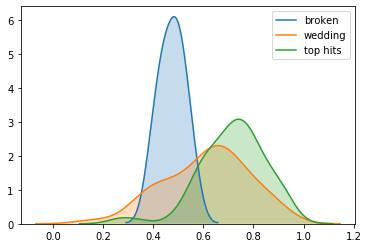

In [21]:
for i in [broken_playlist, wedding_playlist, top_playlist]:
    sns.kdeplot(i.danceability, shade =True)
plt.legend(labels = ['broken', 'wedding', 'top hits']);

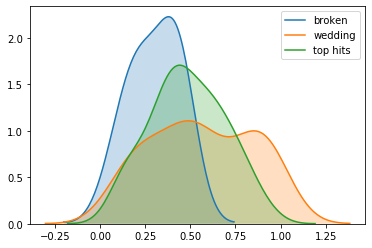

In [22]:
for i in [broken_playlist, wedding_playlist, top_playlist]:
    sns.kdeplot(i.valence, shade =True)
plt.legend(labels = ['broken', 'wedding', 'top hits']);

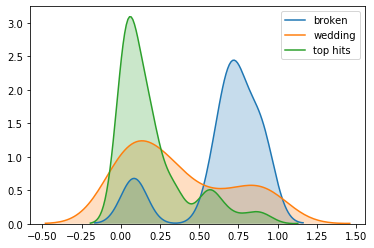

In [23]:
for i in [broken_playlist, wedding_playlist, top_playlist]:
    sns.kdeplot(i.acousticness, shade =True)
plt.legend(labels = ['broken', 'wedding', 'top hits']);

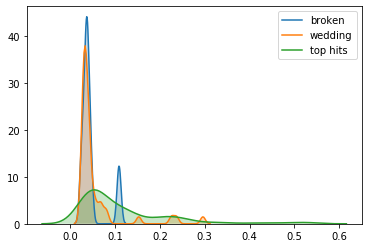

In [24]:
for i in [broken_playlist, wedding_playlist, top_playlist]:
    sns.kdeplot(i.speechiness, shade =True)
plt.legend(labels = ['broken', 'wedding', 'top hits']);

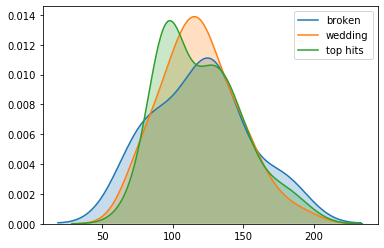

In [25]:
for i in [broken_playlist, wedding_playlist, top_playlist]:
    sns.kdeplot(i.tempo, shade =True)
plt.legend(labels = ['broken', 'wedding', 'top hits']);

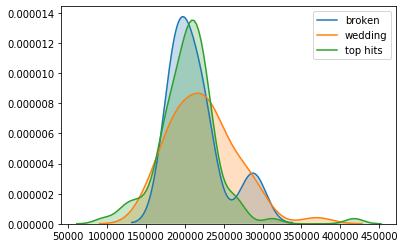

In [27]:
for i in [broken_playlist, wedding_playlist, top_playlist]:
    sns.kdeplot(i.duration_ms, shade =True)
plt.legend(labels = ['broken', 'wedding', 'top hits']);

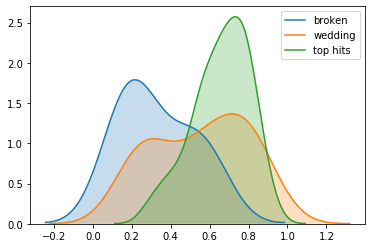

In [30]:
for i in [broken_playlist, wedding_playlist, top_playlist]:
    sns.kdeplot(i.energy, shade =True)
plt.legend(labels = ['broken', 'wedding', 'top hits']);

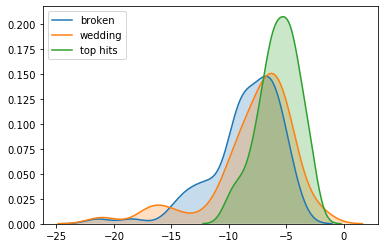

In [22]:
for i in [broken_playlist, wedding_playlist, top_playlist]:
    sns.kdeplot(i.loudness, shade =True)
plt.legend(labels = ['broken', 'wedding', 'top hits']);

In [18]:
wedding_playlist.head()

,artist,album_title,album_uri,track_title,track_id,release_date,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,John Legend,Love In The Future (Expanded Edition),spotify:album:4OTAx9un4e6NfoHuVRiOrC,All of Me,3U4isOIWM3VvDubwSI3y7a,2013-08-30,0.422,0.264,8,-7.064,...,0.1320,0.331,119.930,audio_features,3U4isOIWM3VvDubwSI3y7a,spotify:track:3U4isOIWM3VvDubwSI3y7a,https://api.spotify.com/v1/tracks/3U4isOIWM3Vv...,https://api.spotify.com/v1/audio-analysis/3U4i...,269560,4
1,Bruno Mars,Doo-Wops & Hooligans,spotify:album:1uyf3l2d4XYwiEqAb7t7fX,Marry You,22PMfvdz35fFKYnJyMn077,2010-10-05,0.620,0.832,10,-4.848,...,0.1040,0.481,144.926,audio_features,22PMfvdz35fFKYnJyMn077,spotify:track:22PMfvdz35fFKYnJyMn077,https://api.spotify.com/v1/tracks/22PMfvdz35fF...,https://api.spotify.com/v1/audio-analysis/22PM...,230120,4
2,Ed Sheeran,x (Deluxe Edition),spotify:album:1xn54DMo2qIqBuMqHtUsFd,Thinking out Loud,34gCuhDGsG4bRPIf9bb02f,2014-06-21,0.781,0.445,2,-6.061,...,0.1840,0.591,78.998,audio_features,34gCuhDGsG4bRPIf9bb02f,spotify:track:34gCuhDGsG4bRPIf9bb02f,https://api.spotify.com/v1/tracks/34gCuhDGsG4b...,https://api.spotify.com/v1/audio-analysis/34gC...,281560,4
3,Christina Perri,A Thousand Years,spotify:album:15yvc643iYfQtb6zh9NEJo,A Thousand Years,6lanRgr6wXibZr8KgzXxBl,2011-10-18,0.421,0.407,10,-7.445,...,0.1100,0.161,139.028,audio_features,6lanRgr6wXibZr8KgzXxBl,spotify:track:6lanRgr6wXibZr8KgzXxBl,https://api.spotify.com/v1/tracks/6lanRgr6wXib...,https://api.spotify.com/v1/audio-analysis/6lan...,285120,3
4,The Lumineers,The Lumineers,spotify:album:6NWYmlHxAME5KXtxrTlUxW,Ho Hey,0W4Kpfp1w2xkY3PrV714B7,2012-04-03,0.685,0.466,0,-9.074,...,0.0915,0.353,79.936,audio_features,0W4Kpfp1w2xkY3PrV714B7,spotify:track:0W4Kpfp1w2xkY3PrV714B7,https://api.spotify.com/v1/tracks/0W4Kpfp1w2xk...,https://api.spotify.com/v1/audio-analysis/0W4K...,163133,4


In [1]:
len(hit_genres)

NameError: name 'hit_genres' is not defined